#  灰度变换之伽马变换

## 1.概述

伽玛变换又名指数变换、幂次变换或幂律变换，是另一种常用的非线性变换

伽马变换主要用于图像的校正，将灰度过高或者灰度过低的图片进行修正，增强对比度。变换公式就是对原图像上每一个像素值做乘积运算：

$$ s = c \cdot r^ \gamma  \quad r \in [0,1]$$

其中 c 和 γ 为正常数，有时考虑到偏移量，也将表达式写为:

$$ s = c \cdot (r+ \epsilon)^ \gamma  \quad r \in [0,1]$$

与对数变换不同，伽玛变换可以根据 $\gamma$ 的不同取值选择性地增强低灰度区域的对比度或是高灰度区域的对比度。$\gamma$是图像灰度校正中非常重要的一个参数，其取值决定了输入图像和输出图像之间的灰度映射方式，即决定了是增强低灰度( 阴影区域)还是增强高灰度(高亮区域)。其中：

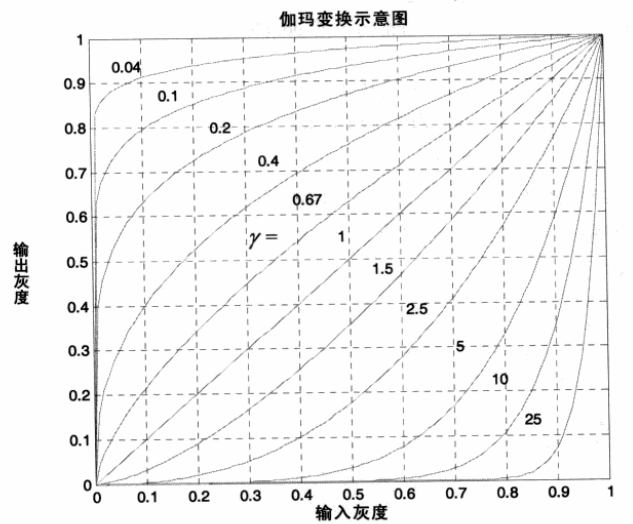

- $ \gamma $ > 1 时，图像的高灰度区城对比度得到增强
- $ \gamma $ < 1 时，图像的低灰度区城对比度得到增强
- $ \gamma $ = 1 时，图像是线性变换，对比度保持不变

针对于数字图像处理，我们可以将公式写为：

$$ output = (input + \epsilon)^\gamma $$

由于幂运算值域变化范围可能太大，对于当前主要的8 bit显示器，我们采用归一化手段：

$$ output = 255 \times (\frac{input + \epsilon} {255})^\gamma $$

## 2. 补偿系数的作用

导入库：

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

定义伽马变换函数：

In [2]:
def gamma_trans(input, gamma=2, eps=0 ):
    return 255. * (((input + eps)/255.) ** gamma)

测试补偿系数为0时的效果：

[[  0.          22.14037214  62.62242911 115.04474833]
 [  0.          22.14037214  62.62242911 115.04474833]
 [  0.          22.14037214  62.62242911 115.04474833]
 [  0.          22.14037214  62.62242911 115.04474833]]


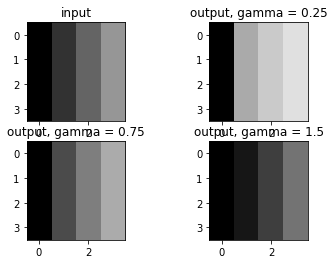

In [3]:
input_arr = np.array( [ [0,  50,  100, 150],
                        [0,  50,  100, 150],
                        [0,  50,  100, 150],
                        [0,  50,  100, 150]] )

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.set_title("input")
ax0.imshow(input_arr, cmap='gray',vmin=0,vmax=255)

gamma = 0.25
output = gamma_trans(input_arr, gamma=gamma, eps=0)
ax1 = fig.add_subplot(222)
ax1.set_title("output, gamma = " + str(gamma))
ax1.imshow(output, cmap='gray', vmin=0, vmax=255)

gamma = 0.75
output = gamma_trans(input_arr, gamma=gamma, eps=0)
ax1 = fig.add_subplot(223)
ax1.set_title("output, gamma = " + str(gamma))
ax1.imshow(output, cmap='gray', vmin=0, vmax=255)

gamma = 1.5
output = gamma_trans(input_arr, gamma=gamma, eps=0)
ax1 = fig.add_subplot(224)
ax1.set_title("output, gamma = " + str(gamma))
ax1.imshow(output, cmap='gray', vmin=0, vmax=255)
print(output)

plt.show()

由图可以看到，如果补偿系数 $\epsilon = 0$，则灰度等于0的区域将不会产生任何变化，我们添加一个补偿系数$\epsilon = 0.5$： 

[[2.21403721e-02 2.24733066e+01 6.30926839e+01 1.15620451e+02]
 [2.21403721e-02 2.24733066e+01 6.30926839e+01 1.15620451e+02]
 [2.21403721e-02 2.24733066e+01 6.30926839e+01 1.15620451e+02]
 [2.21403721e-02 2.24733066e+01 6.30926839e+01 1.15620451e+02]]


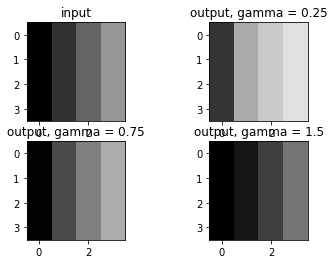

In [4]:
input_arr = np.array( [ [0,  50,  100, 150],
                        [0,  50,  100, 150],
                        [0,  50,  100, 150],
                        [0,  50,  100, 150]] )

fig = plt.figure()
ax0 = fig.add_subplot(221)
ax0.set_title("input")
ax0.imshow(input_arr, cmap='gray',vmin=0,vmax=255)

gamma = 0.25
output = gamma_trans(input_arr, gamma=gamma, eps=0.5)
ax1 = fig.add_subplot(222)
ax1.set_title("output, gamma = " + str(gamma))
ax1.imshow(output, cmap='gray', vmin=0, vmax=255)

gamma = 0.75
output = gamma_trans(input_arr, gamma=gamma, eps=0.5)
ax1 = fig.add_subplot(223)
ax1.set_title("output, gamma = " + str(gamma))
ax1.imshow(output, cmap='gray', vmin=0, vmax=255)

gamma = 1.5
output = gamma_trans(input_arr, gamma=gamma, eps=0.5)
ax1 = fig.add_subplot(224)
ax1.set_title("output, gamma = " + str(gamma))
ax1.imshow(output, cmap='gray', vmin=0, vmax=255)
print(output)

plt.show()

可以看到整体的对比度都有变化，灰度值为0的问题可以避免

## 3. 伽马变换矫正显示失真

老式电视机CRT会有显示失真的问题，不同的电视有不同的失真指数
我们假设某老式电视失真指数$\gamma = 0.5$，我们使用伽马变换进行矫正，只需取矫正指数$\gamma ' = \frac{1}{\gamma}$

原图像：

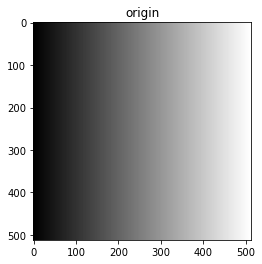

In [5]:
gray_img = np.asarray(Image.open('./image/intensity_ramp.tif').convert('L'))
fig = plt.figure()
ax0 = fig.add_subplot()
ax0.set_title("origin")
ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)
plt.show()

失真图像和伽马矫正：

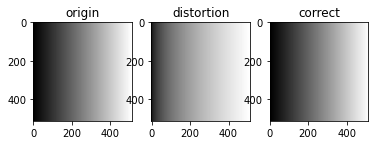

In [6]:
gray_img = np.asarray(Image.open('./image/intensity_ramp.tif').convert('L'))

fig = plt.figure()
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

gamma=0.5
ax0.set_title("origin")
ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)
ax1.set_title("distortion")
distortion = gamma_trans(gray_img, gamma=gamma, eps=0)
ax1.imshow(distortion, cmap='gray',vmin=0,vmax=255)
ax2.set_title("correct")
correct = gamma_trans(distortion, gamma=1/gamma, eps=0)
ax2.imshow(correct, cmap='gray',vmin=0,vmax=255)
plt.show()

此处看起来是脱裤子放屁多此一举，但是实际中失真指数是不知道的，需要去得到矫正指数

## 4. 伽马变换拉伸对比度

对于暗色照片，我们可以进行伽马系数小于一的伽马变换从而提高低灰度值的对比度

原图像：

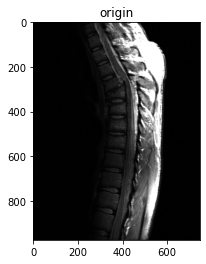

In [7]:
gray_img = np.asarray(Image.open('./image/fractured_spine.tif').convert('L'))
fig = plt.figure()
ax0 = fig.add_subplot()
ax0.set_title("origin")
ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)
plt.show()

伽马变换：

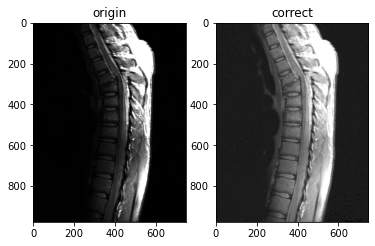

In [8]:
gray_img = np.asarray(Image.open('./image/fractured_spine.tif').convert('L'))

fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

gamma=0.4
ax0.set_title("origin")
ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)
ax1.set_title("correct")
correct = gamma_trans(gray_img, gamma=gamma, eps=0)
ax1.imshow(correct, cmap='gray',vmin=0,vmax=255)
plt.show()

- 注意此处的伽马系数0.4是一种探索得出的数字，不一定是最佳值，下面的2.0同理

对于亮色照片，我们可以进行伽马系数大于一的伽马变换从而提高低灰度值的对比度

原图像：

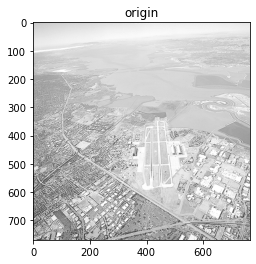

In [9]:
gray_img = np.asarray(Image.open('./image/washed_out.tif').convert('L'))
fig = plt.figure()
ax0 = fig.add_subplot()
ax0.set_title("origin")
ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)
plt.show()

伽马变换：

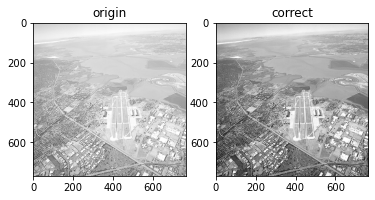

In [10]:
gray_img = np.asarray(Image.open('./image/washed_out.tif').convert('L'))

fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

gamma = 2.0
ax0.set_title("origin")
ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)
ax1.set_title("correct")
correct = gamma_trans(gray_img, gamma=gamma, eps=0)
ax1.imshow(correct, cmap='gray',vmin=0,vmax=255)
plt.show()

可以看到伽马变换带来的图像增强效果还是显著的

## 5. 参考资料

\[1][FPGA实现图像的非线性变换：伽玛（幂律）变换](https://www.cnblogs.com/xianyufpga/p/12514861.html)

\[2][opencv+python学习记录（九）伽马变换](https://www.jianshu.com/p/46503ef647fc)

\[3][【手写图像处理库2】耳熟能详的对比度调节，伽马变换当仁不让，Photoshop默默点了个赞！冈萨雷斯《数字图像处理》，灰度变](https://www.bilibili.com/video/BV1iS4y1o7Ek/?spm_id_from=333.788)